In [1]:
import pandas as pd

penguins = pd.read_csv('data/penguins_classification.csv')
penguins

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
...,...,...,...
337,55.8,19.8,Chinstrap
338,43.5,18.1,Chinstrap
339,49.6,18.2,Chinstrap
340,50.8,19.0,Chinstrap


In [2]:
penguins.columns = ['leng', 'depth','species']

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(penguins.drop(columns='species'), penguins['species'], random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train,target_train)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'depth <= 16.45\nsamples = 256\nvalue = [107, 53, 96]\nclass = Adelie'),
 Text(0.25, 0.25, 'samples = 95\nvalue = [4, 1, 90]\nclass = Gentoo'),
 Text(0.75, 0.25, 'samples = 161\nvalue = [103, 52, 6]\nclass = Adelie')]

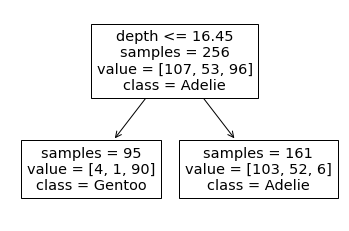

In [12]:
from sklearn.tree import plot_tree
plot_tree(tree, feature_names=['leng', 'depth'], class_names=tree.classes_, impurity=False)


* we see that the sample superior to 16.45 belongs mainly to the Adelie class. 

* Looking at the values, we indeed observe 103 Adelie individuals in this space. We also count 52 Chinstrap samples and 6 Gentoo samples

In [17]:
sample_1 = pd.DataFrame(
    {"leng": [0], "depth": [15]}
)
tree.predict(sample_1)

array(['Gentoo'], dtype=object)

In [18]:
sample_2 = pd.DataFrame(
    {"leng": [0], "depth": [17]}
)
tree.predict(sample_2)

array(['Adelie'], dtype=object)

### Thus, we can conclude that a decision tree classifier will predict the most represented class within a partition.

<AxesSubplot:>

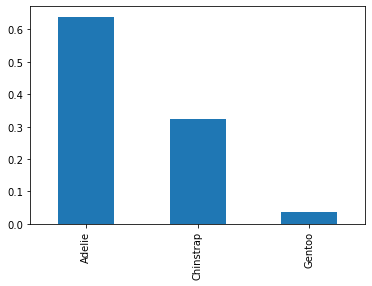

In [19]:
y_pred_proba = tree.predict_proba(sample_2)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)
y_proba_class_0.plot.bar()

It is also important to note that the culmen length has been disregarded for the moment. 

It means that whatever the value given, it will not be used during the prediction.

Going back to our classification problem, the split found with a maximum depth of 1 is not powerful enough to separate the three species and the model accuracy is low when compared to the linear model.



In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train,target_train)
tree.score(data_test, target_test)


0.9651162790697675

[Text(0.5, 0.8333333333333334, 'depth <= 16.45\nsamples = 256\nvalue = [107, 53, 96]\nclass = Adelie'),
 Text(0.25, 0.5, 'leng <= 39.3\nsamples = 95\nvalue = [4, 1, 90]\nclass = Gentoo'),
 Text(0.125, 0.16666666666666666, 'samples = 4\nvalue = [4, 0, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'samples = 91\nvalue = [0, 1, 90]\nclass = Gentoo'),
 Text(0.75, 0.5, 'leng <= 44.25\nsamples = 161\nvalue = [103, 52, 6]\nclass = Adelie'),
 Text(0.625, 0.16666666666666666, 'samples = 105\nvalue = [100, 5, 0]\nclass = Adelie'),
 Text(0.875, 0.16666666666666666, 'samples = 56\nvalue = [3, 47, 6]\nclass = Chinstrap')]

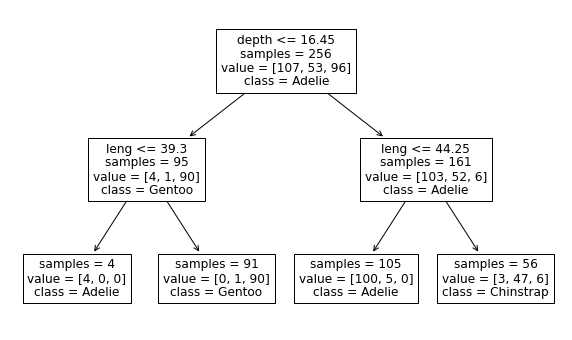

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names=data_train.columns, class_names=target_test.unique(), impurity=False)

In [32]:
a = tree.predict_proba(data_test)
asd = pd.DataFrame(a[0:9], columns=target_test.unique())

<AxesSubplot:>

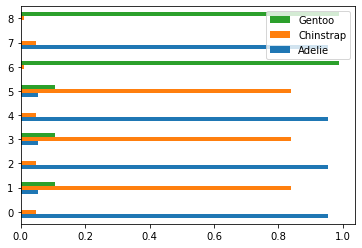

In [42]:
asd.plot.barh(legend='reverse')
# plt.legend()